In [51]:
from PIL import Image
import numpy as np
import cv2

In [16]:
lena_image = Image.open("no_index/lena.png")

# Thumbnail
preserves aspect ratios

In [11]:
lena_image.thumbnail((128, 128))

# Cropping

Can be useful along with pasting

In [19]:
region = lena_image.crop((10, 10, 150, 150)).transpose(Image.ROTATE_180)

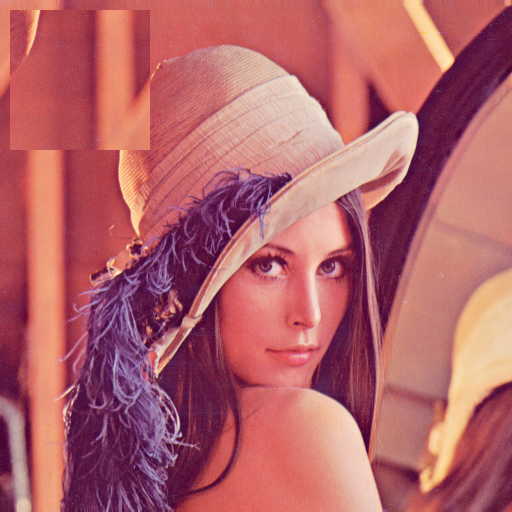

In [21]:
lena_image.paste(region, (10, 10, 150, 150))
lena_image

# Resizing

Compared to thumbnail do not preserve aspect ratios

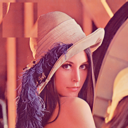

In [25]:
lena_image.resize((128, 128))

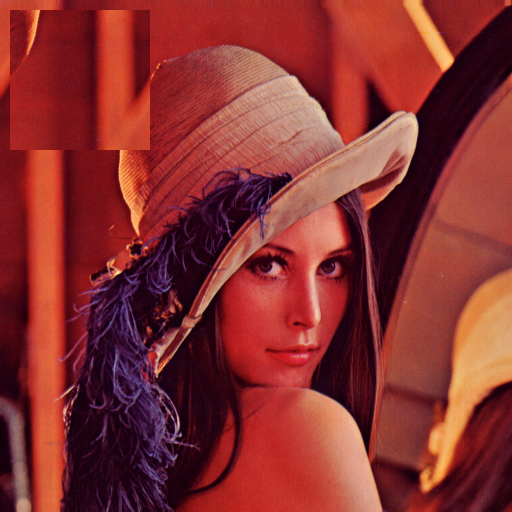

In [48]:
lena_array = np.array(lena_image)
lena_array = (255.0 * (lena_array / 255.0) ** 2).astype(np.uint8)
lena = Image.fromarray(lena_array)
lena

# Blurring

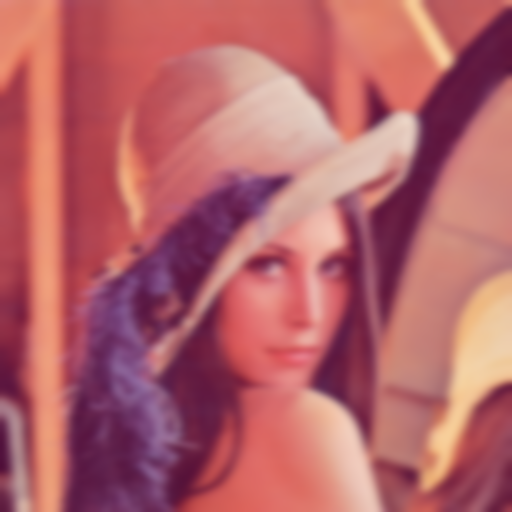

In [70]:
lena_image = np.array(Image.open("no_index/lena.png"))
lena_dst = lena_image.copy()
cv2.GaussianBlur(lena_image, (25, 25), 5, lena_dst, 3)

lena_dst = Image.fromarray(lena_dst.astype(np.uint8))
lena_dst

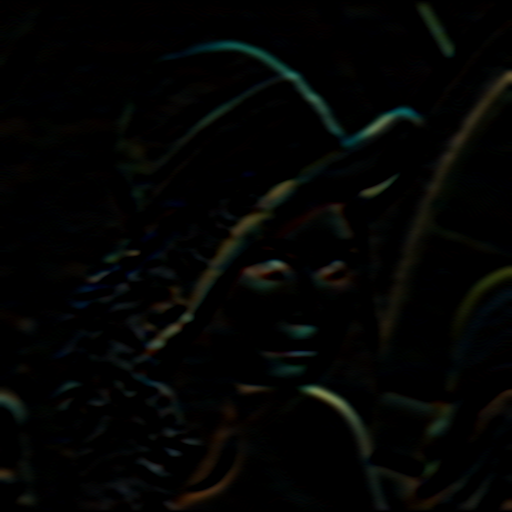

In [72]:
Image.fromarray(cv2.Sobel(np.array(lena_dst), 0, 0, 1, ksize=3))